## 🛍️ Customer Segmentation with Unsupervised Learning

This project applies K-Means and DBSCAN clustering algorithms to segment mall customers based on purchasing behavior. Using the Mall_Customers.csv dataset, the analysis identifies natural customer groups to support strategic marketing decisions, personalization, and behavioral insights.

### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Data Import and Basic Exploration

In [6]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

In [8]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

## Univariate Analysis

Univariate analysis involves examining each variable individually to understand its distribution, central tendency, and spread. In the context of this clustering project, this step is essential for gaining an initial understanding of the dataset before applying any clustering algorithm.

### Age Distribution

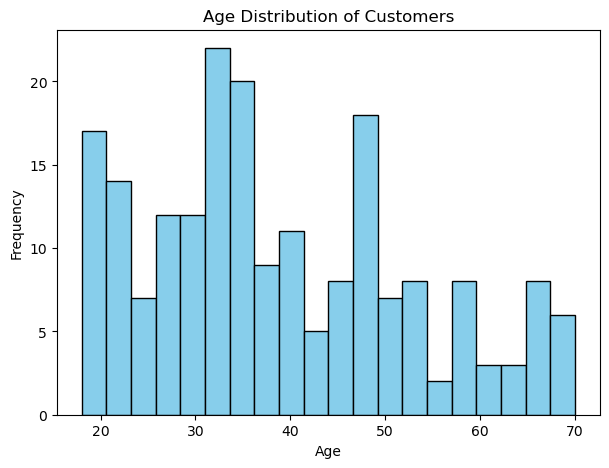

In [9]:
plt.figure(figsize=(7,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Annual Income distribution

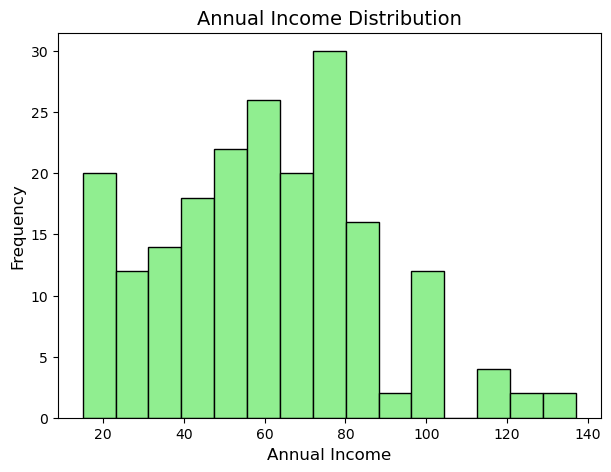

In [10]:
plt.figure(figsize=(7,5))
plt.hist(df['Annual_Income'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Spending Score distribution

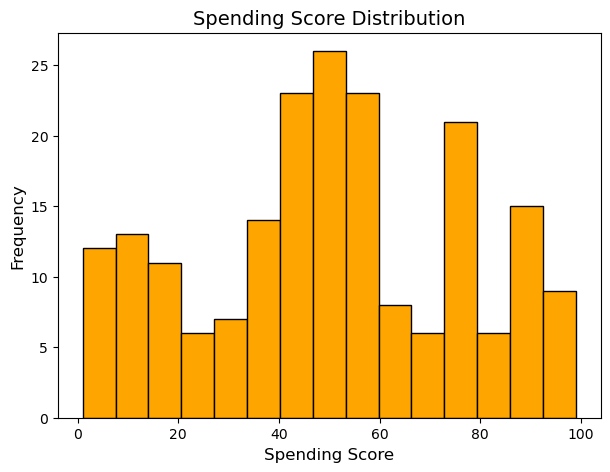

In [11]:
plt.figure(figsize=(7,5))
plt.hist(df['Spending_Score'], bins=15, color='orange', edgecolor='black')
plt.title('Spending Score Distribution', fontsize=14)
plt.xlabel('Spending Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## Bivariate Analysis

Bivariate Analysis involves examining the relationship between two variables to identify patterns, correlations, or associations between them. In the context of this clustering project, this step is crucial for understanding how different features interact with one another — for example, how Annual Income relates to Spending Score. By visualizing and analyzing these relationships, we can detect trends or groupings that guide the selection of features and improve the effectiveness of the clustering algorithm.

### Age vs Spending

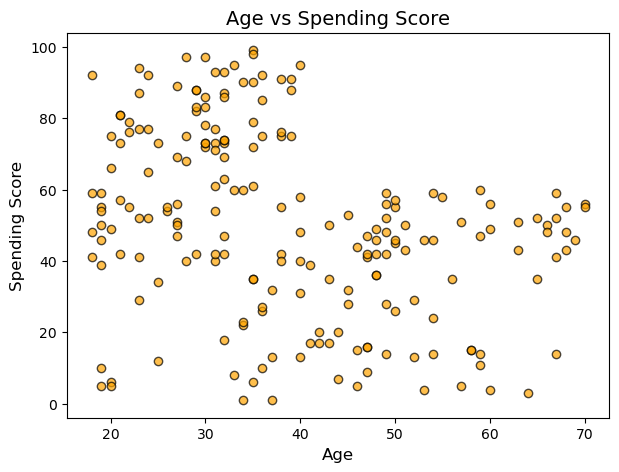

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Spending_Score'], color='orange', edgecolor='black', alpha=0.7)
plt.title('Age vs Spending Score', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.show()

### Annual_Income vs Spending Score

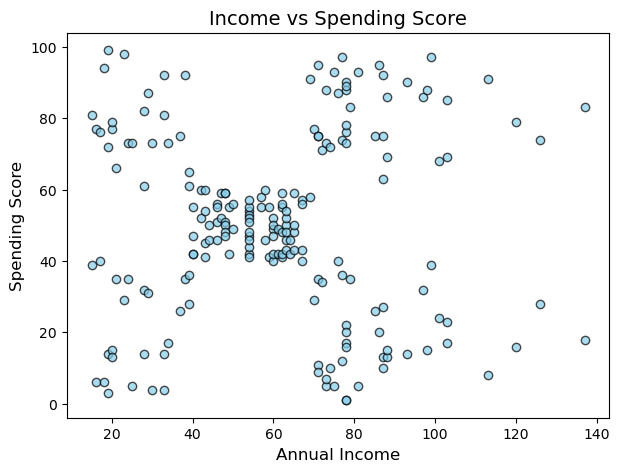

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df['Annual_Income'], df['Spending_Score'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Income vs Spending Score', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.show()

### Correlation between Age, Annual Income, Spending Score

Correlation analysis was performed to understand the relationships between numerical variables in the dataset, specifically, Age, Annual Income, and Spending Score.

This step helps identify how strongly and in what direction (positive or negative) these variables are related to one another. In the context of clustering, understanding correlations is important because:


🧩Highly correlated features may carry redundant information and can distort clustering results.

🧩Weakly or uncorrelated features often provide more unique information, making them better inputs for clustering.

🧩It also gives insight into how customer behaviors are linked.

By visualizing the correlation matrix with a heatmap, we can quickly detect patterns, such as whether higher income corresponds to higher spending scores or if age has an inverse relationship with spending.

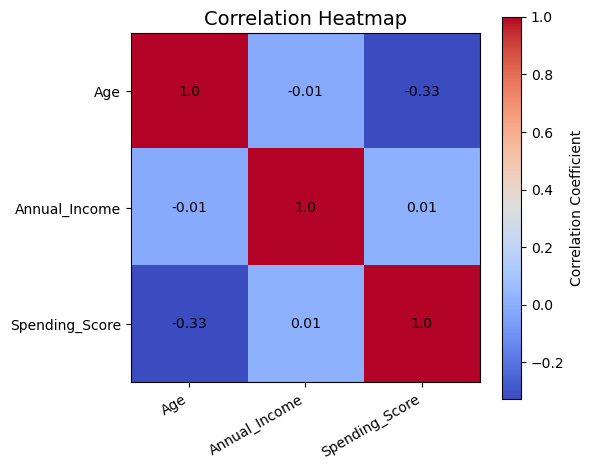

In [14]:
# Compute correlation matrix
corr = df[['Age', 'Annual_Income', 'Spending_Score']].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')

# Add labels
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=30, ha='right')
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap', fontsize=14)

# Add correlation values on the cells
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, round(corr.iloc[i, j], 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

### Feature Scaling

Feature scaling is a data preprocessing technique used to normalize or standardize the range of independent variables (features) in a dataset. It ensures that all features contribute equally to the analysis or model training

In [15]:
# Select the features to scale
X = df[['Annual_Income', 'Spending_Score']]

# Initialise the scaler
scaler = StandardScaler()

# Fit to data and transform
X_scaled = scaler.fit_transform(X)

### Finding the optimal number of clusters (k)

In clustering analysis, determining the optimal number of clusters (k) is crucial for meaningful results. One common method is the Elbow Method, where the model is run with different values of k, and the inertia (sum of squared distances to cluster centers) is plotted against k. The point where the decrease in inertia begins to slow down forming an “elbow” indicates the optimal number of clusters.

/lib/python3.13/site-packages/threadpoolctl.py:1123: RuntimeWarning: JsProxy.as_object_map() is deprecated. Use as_py_json() instead.
  for filepath in LDSO.loadedLibsByName.as_object_map():


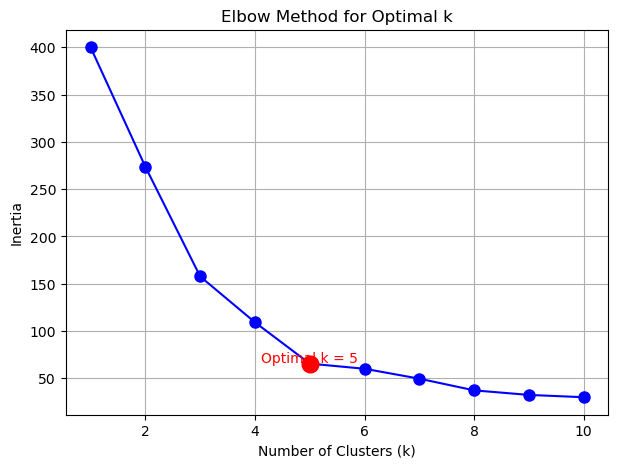

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for k = 1 to 10
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(7,5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Find the "elbow" visually or define manually (example: k=5)
optimal_k = 5  # Change this after you visually identify your elbow

# Highlight the elbow point
plt.plot(optimal_k, inertia[optimal_k-1], 'ro', markersize=12)
plt.text(optimal_k, inertia[optimal_k-1]*1.02, f'Optimal k = {optimal_k}', color='red', fontsize=10, ha='center')

plt.grid(True)
plt.show()

### K-Means Clustering.

K-Means was selected for this clustering project because it is one of the most efficient and widely used algorithms for partitioning data into meaningful groups. The dataset used in this analysis contains numerical features such as Age, Annual Income, and Spending Score, which makes K-Means a highly suitable choice since it performs best with continuous numerical variables.

K-Means is particularly effective when the goal is to identify natural groupings or customer segments based on similarities in their behaviour. It scales well with larger datasets, is computationally fast, and produces clear, easily interpretable cluster boundaries. Additionally, the algorithm works well with standardized data, which fits the preprocessing steps applied in this project.

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = kmeans_labels

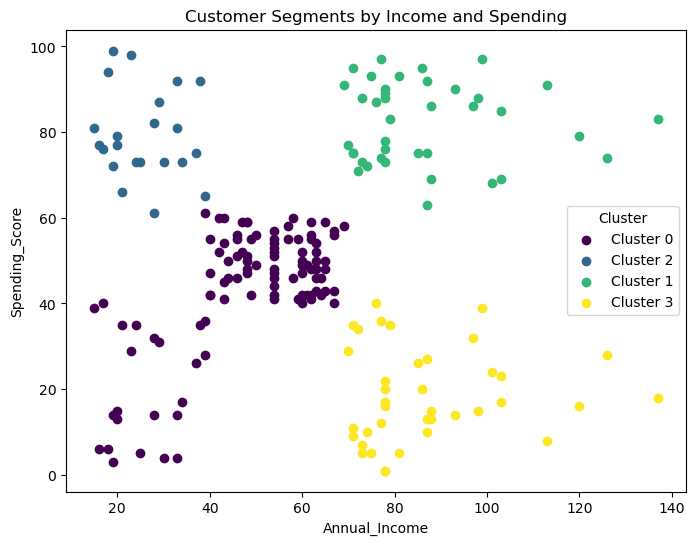

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Get unique clusters
clusters = df['Cluster'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

# Plot each cluster manually
for cluster, color in zip(clusters, colors):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'], 
                label=f'Cluster {cluster}', color=color)

plt.title('Customer Segments by Income and Spending')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.legend(title='Cluster')
plt.show()

### DBSCAN Clustering

DBSCAN was also used to complement the limitations of K-Means and provide a more flexible clustering approach. Unlike K-Means, which assumes clusters are spherical and roughly equal in size, DBSCAN is capable of detecting arbitrarily shaped clusters and is particularly effective at identifying noise or outliers in the dataset. This makes it valuable when the data may contain irregular groupings or customers who do not fit neatly into any segment.

Because DBSCAN does not require specifying the number of clusters in advance, it offers an additional perspective on the natural structure of the data.

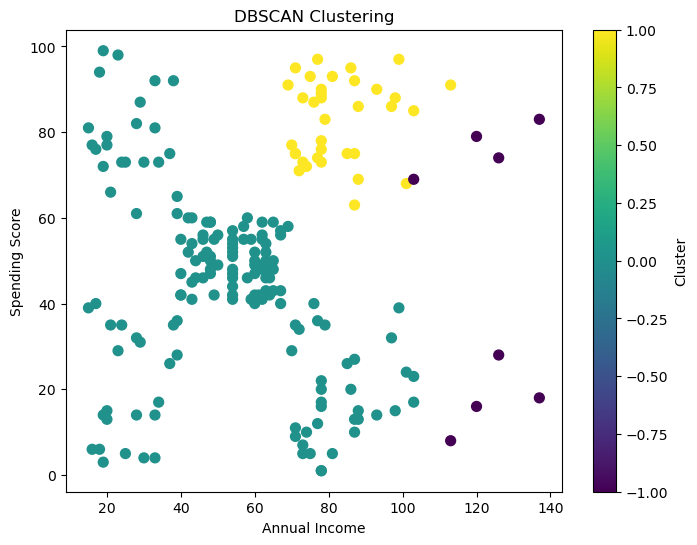

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Initialize DBSCAN
# eps = maximum distance between two samples to be considered neighbors
# min_samples = minimum number of points to form a dense region
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN and get cluster labels
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [20]:
df.to_csv('Mall_Customers_Clustered.csv', index=False)

## Performance
K-Means performed better (0.49 vs 0.38).
This suggests:
The data likely forms clusters that are more globular, balanced, or well-separated
DBSCAN did not generalize well, possibly due to noise or density variation
K-Means is therefore the preferred model for this dataset

In [21]:
from sklearn.metrics import silhouette_score

# K-means silhouette score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_score)

# --- Correct DBSCAN silhouette score ---
# Remove noise points (-1)
mask = dbscan_labels != -1
X_dbscan = X_scaled[mask]
labels_dbscan = dbscan_labels[mask]

dbscan_score = silhouette_score(X_dbscan, labels_dbscan)
print("DBSCAN Silhouette Score:", dbscan_score)


K-Means Silhouette Score: 0.49434988482196796
DBSCAN Silhouette Score: 0.3875583892728279
